# Logistic Regression

In this notebook the following topics are covered:

1. Odds
2. Dependent Binary Variables
3. Logistic Regression
4. Applied Logistic Regression on `Default` Dataset
5. Predictions and Confusion Matrix
6. Sensitivity, Specificity, and the ROC Curve

In [111]:
set.seed(37)
options(warn=-1)

## Odds

*Odds* are one way to express the likelihood that an event will take place (Ex: horse winning a race).

* Odds can be expressed as *X to Y* , *X:Y* or *X/Y*
* Gambling odds are called ***odds against*** or the probability that an event will not happen is greater than the probability it will
    * 10 to 1 odds means for every \$1 you bet, you'll be paid $10*1$ or $10 if you win
* This notebook deals with ***odds for*** or the probability that an event will occur

*Odds* are a ratio of probabilities

***Odds for*** is a ratio = $\frac{\text{probability that the event will happen}}{\text{probability that the event will not happen}}$

Let *p*=probability that the event happens $$\text{Odds for = }\frac{p}{(1-p)}$$

As an example, let's consider the case of *Odds for* is 2:1

$$
\begin{align*}
\frac{2}{1} &= \frac{p}{(1-p)} \\ 
2(1-p) &= p\\ 
2-2p &= p\\ 
2 &=3p\\
\frac{2}{3} &= p
\end{align*}
$$

Thus the probability the event will happen is $\frac{2}{3}$ or 66.67%. Conversely the probability the event will not happen is $1 - \frac{2}{3} = 1 - 0.6667 = \frac{1}{3} = 0.333$ or 33.33%

So if we know the *Odds for* we can use the equation

$$\text{Odds for = }\frac{p}{(1-p)}$$

to find the probability *p* and if we are given *p*, we can use the equation

$$p = \frac{\text{Odds for}}{1 + \text{Odds for}}$$ to find the *Odds for*.

Some example *Odds for* are shown in the table below:

| Odds | *Odds for* | *p*  | (1-*p*) |
|------|------------|------|---------|
| 2:1  | 2/1 = 2    | 0.67 | 0.33    |
| 3:2  | 3/2 = 1.5  | 0.6  | 0.4     |
| 3:1  | 3/1 = 3    | 0.75 | 0.25    |
| 4:1  | 4/1 = 4    | 0.8  | 0.2     |
| 9:1  | 9/1 = 9    | 0.9  | 0.1     |
| 10:1 | 10/1 = 10  | 0.91 | 0.09    |
| 1:2  | 1/2 = 0.5  | 0.33 | 0.67    |
| 1:3  | 1/3 = 0.33 | 0.25 | 0.75    |
| 2:3  | 2/3 = 0.67 | 0.4  | 0.6     |
| 1:4  | 1/4 = 0.25 | 0.2  | 0.8     |

***Ex 1:***

A betting site shows the *odds against* that the Patriots will win the next super bowl as 5:1. What is the probability of the Patriots winning the next super bowl?

5:1 odds against is 1:5 odds for or 0.2

$$
\begin{align*}
\frac{1}{5} &= \frac{p}{(1-p)} \\ 
1(1-p) &= 5p\\ 
1-p &= 5p\\ 
1 &=6p\\
\frac{1}{6} &= p
\end{align*}
$$

So the probability *p* of the Patriots winning the super bowl is $p=\frac{1}{6}$ or 16.67%.

***Ex 2:***

Team Brazil has a 12.5% probabilty of winning the next world cup. What is the *odds for* Team Brazil winning the next World Cup?

Using our equation...

$$
\begin{align*}
p = \frac{\text{Odds for}}{1 + \text{Odds for}} \\ 
0.125 = \frac{\text{Odds for}}{1 + \text{Odds for}}\\ 
0.125(1 + \text{Odds for}) &= \text{Odds for}\\ 
0.125 + 0.125\text{Odds for} &= \text{Odds for}\\
\frac{1}{8} &= \frac{7}{8}\text{Odds for}\\
\frac{1}{8} * \frac{8}{7} &= \text{Odds for}\\
\frac{1}{7} &= \text{Odds for}
\end{align*}
$$

So the *odds for* Team Brazil winning the next World Cup are 1:7.

## Dependent Binary Variables

Examples include:
* Whether student gets an A in a class
* Whether a customer will default on loan or not
* Whether someone is infected with a disease or not

In the following synthetic dataset, a `Grade` of 1 indicates that a student got an A on the exam. `Hours` refers to the amount of hours a student spent studying for the exam.

In [112]:
grades <- read.csv('GradesR.csv')

In [113]:
str(grades)

'data.frame':	100 obs. of  3 variables:
 $ Student: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Grade  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Hours  : int  38 30 40 40 52 23 61 32 43 32 ...


In [114]:
head(grades)

Student,Grade,Hours
1,0,38
2,0,30
3,0,40
4,0,40
5,0,52
6,0,23


Let's make a boxplot of `Hours` as a function of `Grade` and look for discernible differences in studying hours between those who got an A on the exam and those who did not.

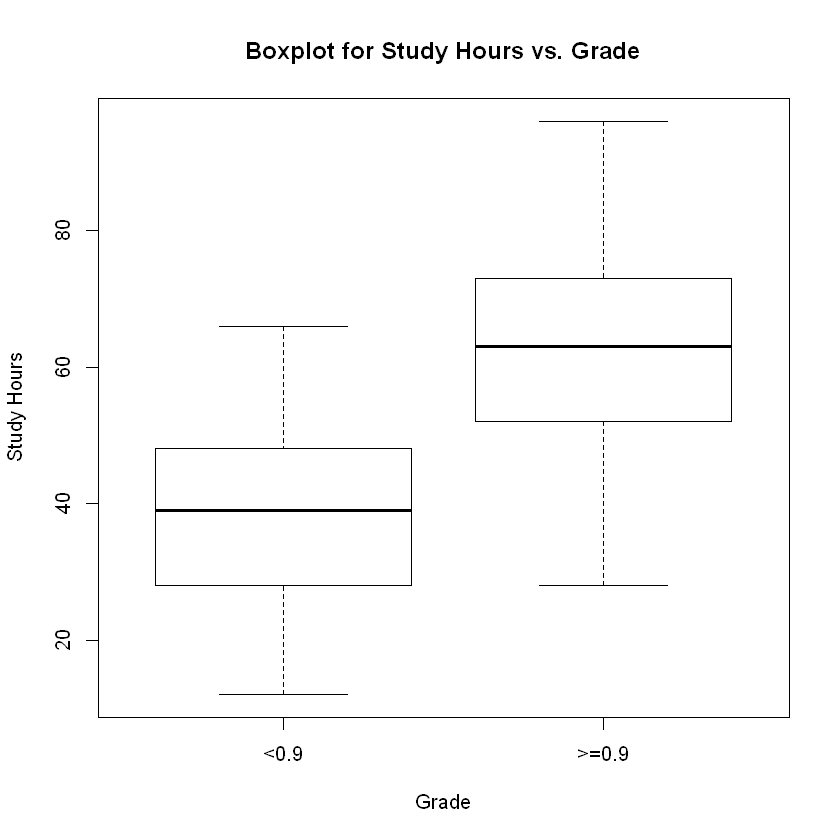

In [115]:
boxplot(Hours~Grade,grades, names = c('<0.9', '>=0.9'), main='Boxplot for Study Hours vs. Grade', ylab='Study Hours', xlab='Grade')

It's pretty clear that those who got an A on the exam studied for many more hours than those who did not! This is supported by the fact that the maximum hours spent studying by students who did not receive an A is equal to the median studying hours of the students who did receive an A.

Now let's regress `Grade` as a function of `Hours` and motivate the need for logistic regression!

In [116]:
grades_linear_model <- lm(Grade~Hours, grades)
summary(grades_linear_model)


Call:
lm(formula = Grade ~ Hours, data = grades)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7630 -0.3060 -0.0284  0.2883  0.8862 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.364520   0.111263  -3.276  0.00146 ** 
Hours        0.017084   0.002084   8.197 9.61e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3889 on 98 degrees of freedom
Multiple R-squared:  0.4068,	Adjusted R-squared:  0.4007 
F-statistic:  67.2 on 1 and 98 DF,  p-value: 9.606e-13


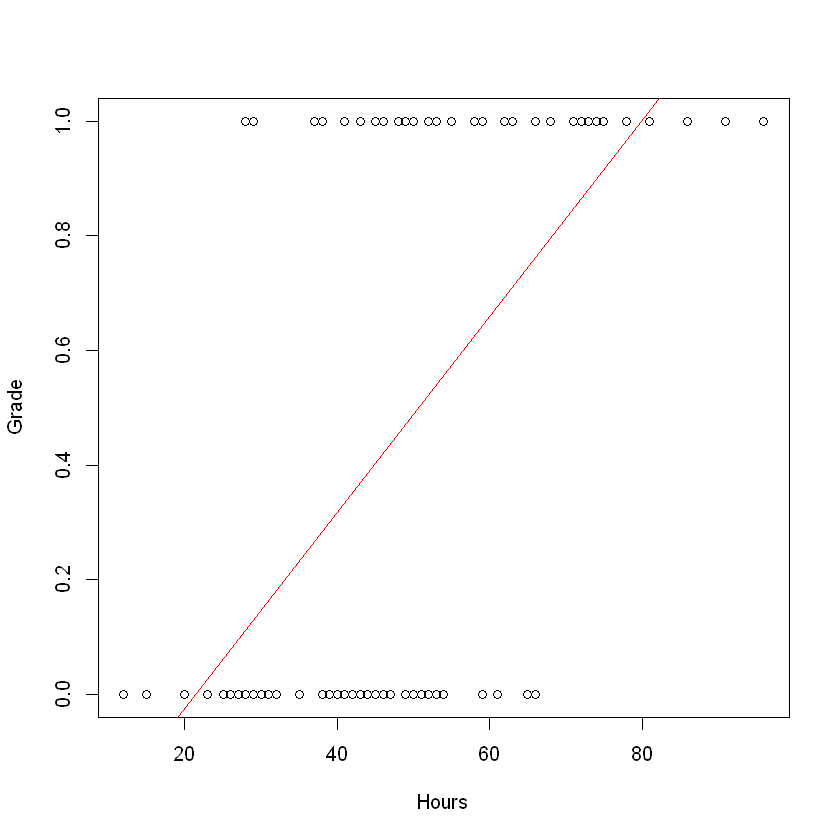

In [117]:
with(grades, plot(Hours, Grade))
abline(grades_linear_model, col="red")

We can clearly see from the poor $R^{2}$ value and from the plot above that linear regression will not work if we are trying to predict the probability of a student getting an A on the exam based on the number of hours they spent studying! The graph also reveals another interesting fact:

We can have values less than 0 or greater than 1 which does not make sense because probabilities must always be $\left [0,1 \right]$ The need for a new regression approach targeted for binary classification should now be very clear.

## Logistic Regression

We motivated the need for a regression approach to model qualitative classification problems with an outcome of either 0 or 1. Enter logistic regression!

Our outcome from logistic regression is the ***probability*** of a data point belonging to one class or another.
* Implies our outcome is always $\left [0,1 \right]$

Logistic regression is performed in R with the `glm` [function](https://cran.r-project.org/web/packages/HSAUR/vignettes/Ch_logistic_regression_glm.pdf) called with a binomial `logit` function. Notice the difference in functions plotted below:

In [118]:
grades_logistic_regression_a <- glm(Grade ~Hours,family=binomial(link='logit'),data=grades)

In [119]:
summary(grades_logistic_regression_a)


Call:
glm(formula = Grade ~ Hours, family = binomial(link = "logit"), 
    data = grades)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9605  -0.7154  -0.1654   0.6558   2.2682  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.62929    1.12613  -4.999 5.77e-07 ***
Hours        0.11201    0.02196   5.100 3.40e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 138.589  on 99  degrees of freedom
Residual deviance:  87.744  on 98  degrees of freedom
AIC: 91.744

Number of Fisher Scoring iterations: 5


In [120]:
f <- function (x) 1 / (1 + exp(5.62929 - 0.11201 * x))

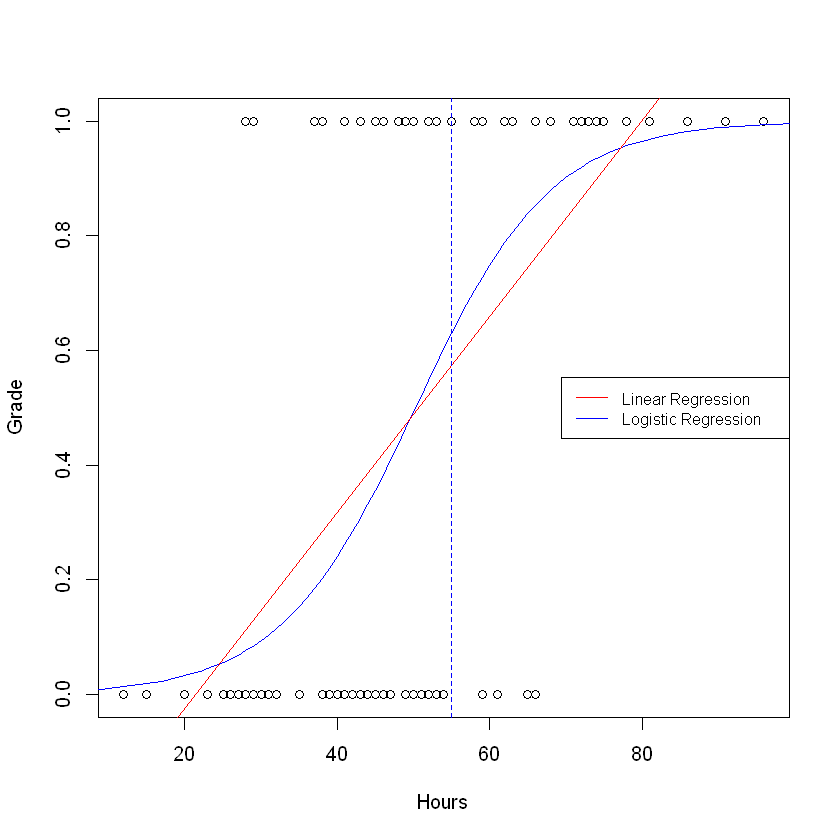

In [121]:
with(grades, plot(Hours, Grade))
x <- -100 : 100
lines(x, f(x), type = "l", col="blue")
abline(grades_linear_model, col="red")
legend('right', legend=c("Linear Regression", "Logistic Regression"),
       col=c("red", "blue"), lty=1:1, cex=0.8)
abline(v=55, col="blue", lty=2)

Notice the difference between the blue and red lines plotted on the graph above? It appears as if there is a natural left-right boundary on the blue S shape curve. This boundary is the threshold that classifies those students who got an A on the exam vs. those who did not!

A dashed line has been superimposed onto the graph at the 55 hour mark to make this point crystal clear - we can see those who studied less than 55 hours typically did not get an A with the exception of a few outliers. These results match up well to the boxplots created above.

## Logistic Function

The logistic function is used to give us the probability of a data point belonging to a certain class.

Let $p(x) = Pr\left (y=1 \, | \, x\right )$
* Probability that $y=1$ given a value of *x*

The logistic function is defined as:

$$
p(x) = \frac{e^{b_{0} + b_{1}x}}{1+e^{b_{0} + b_{1}x}}
$$

The logistic function always spits out a value $\left [0,1 \right]$ for all values of x $\left (-\infty,+\infty \right)$

Let $p = p(x)$ to simplify the notation:

$$
p = \frac{e^{b_{0} + b_{1}x}}{1+e^{b_{0} + b_{1}x}}
$$

So then $q=1-p$ can be written as:

$$
q= 1-p = 1 -\frac{e^{b_{0} + b_{1}x}}{1+e^{b_{0} + b_{1}x}} = \frac{1}{1+e^{b_{0} + b_{1}x}}
$$

Substituting these derivations into our equation for $\text{Odds for = }\frac{p}{(1-p)}$ we arrive at:

$$
\text{Odds for = }\frac{p}{(1-p)} = e^{b_{0} + b_{1}x}
$$

Taking the natural logs on both sides, we get:

$$
log\left(\frac{p}{(1-p)}\right) = log\left(e^{b_{0} + b_{1}x}\right) = b_{0} + b_{1}x
$$

And finally, since $\text{Odds for = }\frac{p}{(1-p)}$, we get: $log\left(\frac{p}{(1-p)}\right)$ the log of odds, or "logit".

***logit model***:

$$
log\left(\frac{p}{(1-p)}\right) = b_{0} + b_{1}x
$$

* The right side of this equation is exactly the same as all of the linear regression models already explored!

## Why Transform from Probability to Log Odds?

1. It is difficult to model a variable that has a restricted range $\left [0,1 \right]$
    * Transforming to Log Odds circumvents this restriction and allows us to model log odds in the range $\left (-\infty,+\infty \right)$
    
2. Log Odds has an easy interpretation

***logit model***:

$$
log\left(\frac{p}{(1-p)}\right) = b_{0} + b_{1}x
$$

* As *x* increases by 1 unit, the natural log of the odds increases by $b_{1}$
    * Equal to the odds increasing by a factor of $e^{b_{1}} \text{~} 100*b_{1}$%

In [122]:
q <- function (x) return (x/(1-x))
ln <- function (x) return (log(x))

In [123]:
x<- c(.001,.01,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,.999,.9999)

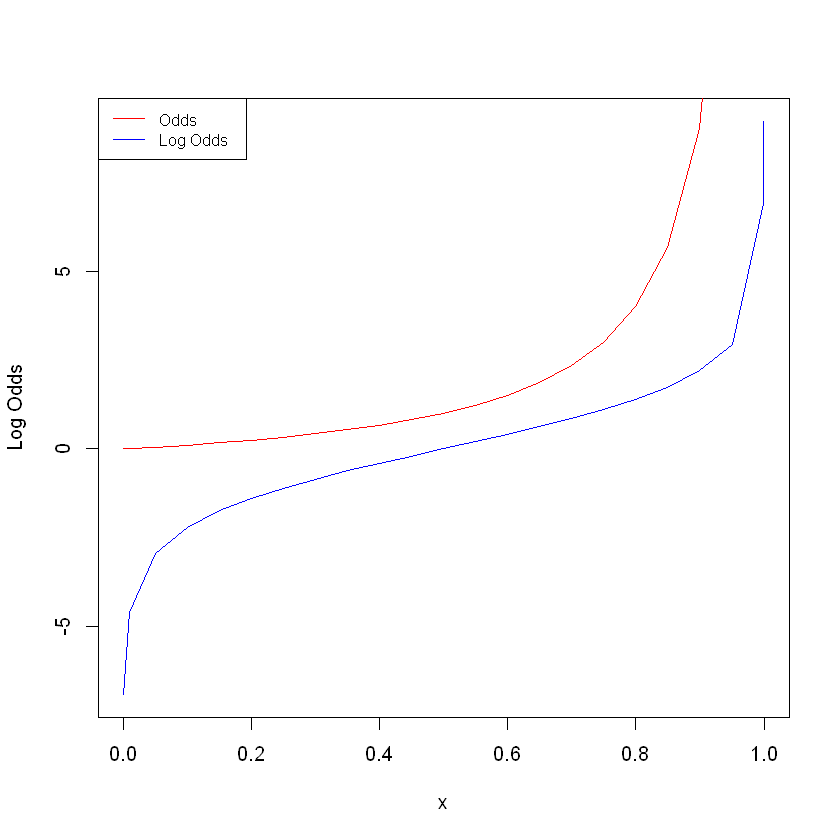

In [124]:
plot(x,ln(q(x)), type = "l", col="blue", ylab = 'Log Odds')
lines(x, q(x), type = "l", col="red")
legend('topleft', legend=c("Odds", "Log Odds"),
       col=c("red", "blue"), lty=1:1, cex=0.8)

Notice how our Log Odds function output ranges from $\left (-\infty,+\infty \right)$ while our Odds function is incapable of outputting negative values of x.

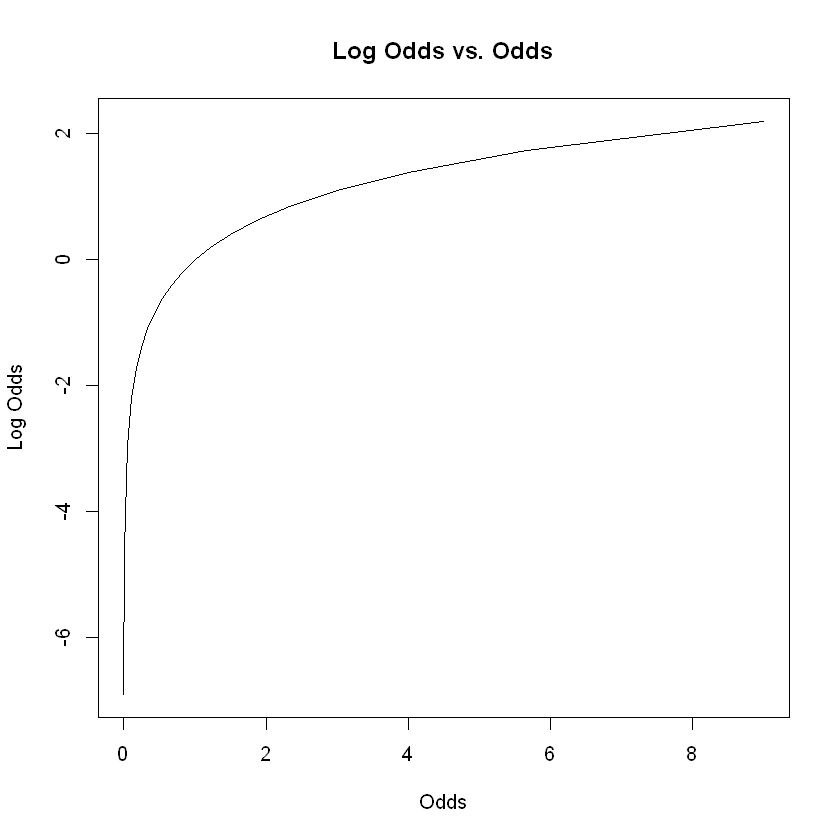

In [125]:
plot(q(x)[0:20],ln(q(x))[0:20], type = "l", col="black", xlab = 'Odds', ylab = 'Log Odds', main = 'Log Odds vs. Odds')

Notice how our Log Odds function plateaus while Odds continues towards infinity, just like any other logarithmic function.

## Applied Logistic Regression

Now that we have the theory taken care of - let's apply logistic regression to the `Default` dataset in the `ISLR` package!

In [126]:
library(ggplot2)
library(ISLR)
data(Default)

In [127]:
str(Default)

'data.frame':	10000 obs. of  4 variables:
 $ default: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ student: Factor w/ 2 levels "No","Yes": 1 2 1 1 1 2 1 2 1 1 ...
 $ balance: num  730 817 1074 529 786 ...
 $ income : num  44362 12106 31767 35704 38463 ...


In [128]:
head(Default)

default,student,balance,income
No,No,729.5265,44361.625
No,Yes,817.1804,12106.135
No,No,1073.5492,31767.139
No,No,529.2506,35704.494
No,No,785.6559,38463.496
No,Yes,919.5885,7491.559


`default` is our target variable in this example. First lets create a copy of the data and make dummy variables for both `default` and `student`.

In [129]:
df <- cbind(Default)
df$dft <- ifelse(df$default == "Yes", 1, 0)
df$stdt <- ifelse(df$student == "Yes", 1, 0)
head(df)

default,student,balance,income,dft,stdt
No,No,729.5265,44361.625,0,0
No,Yes,817.1804,12106.135,0,1
No,No,1073.5492,31767.139,0,0
No,No,529.2506,35704.494,0,0
No,No,785.6559,38463.496,0,0
No,Yes,919.5885,7491.559,0,1


Let's do some exploratory data analysis before we model anything.

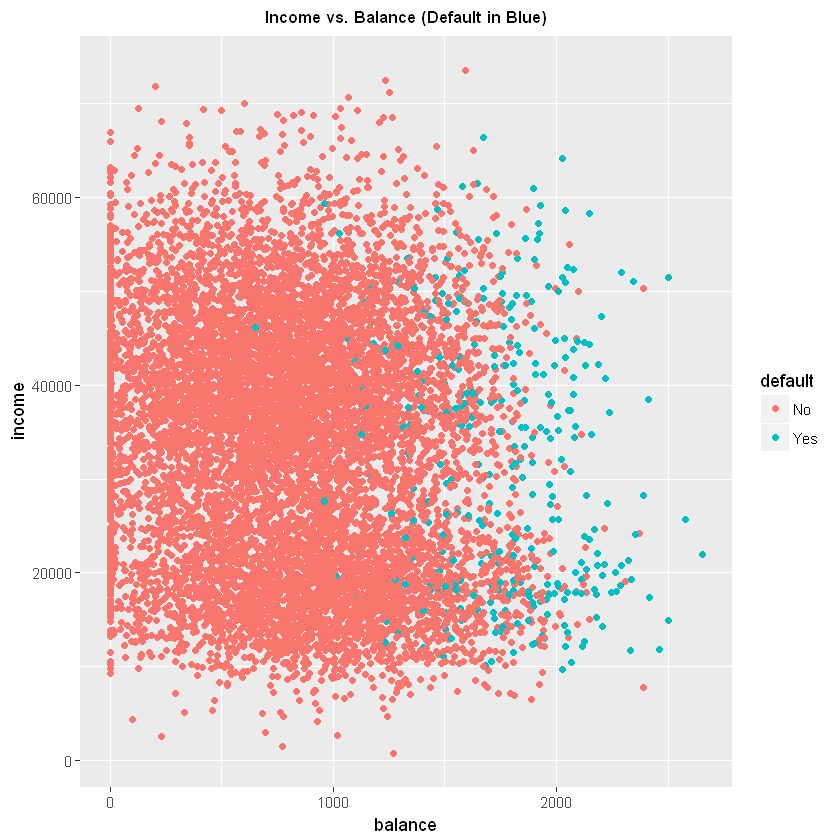

In [130]:
ggplot(Default, aes(x=balance, y=income, col=default)) + geom_point() + ggtitle("Income vs. Balance (Default in Blue)") + theme(plot.title = element_text(size = 10, face = "bold", hjust = 0.5))

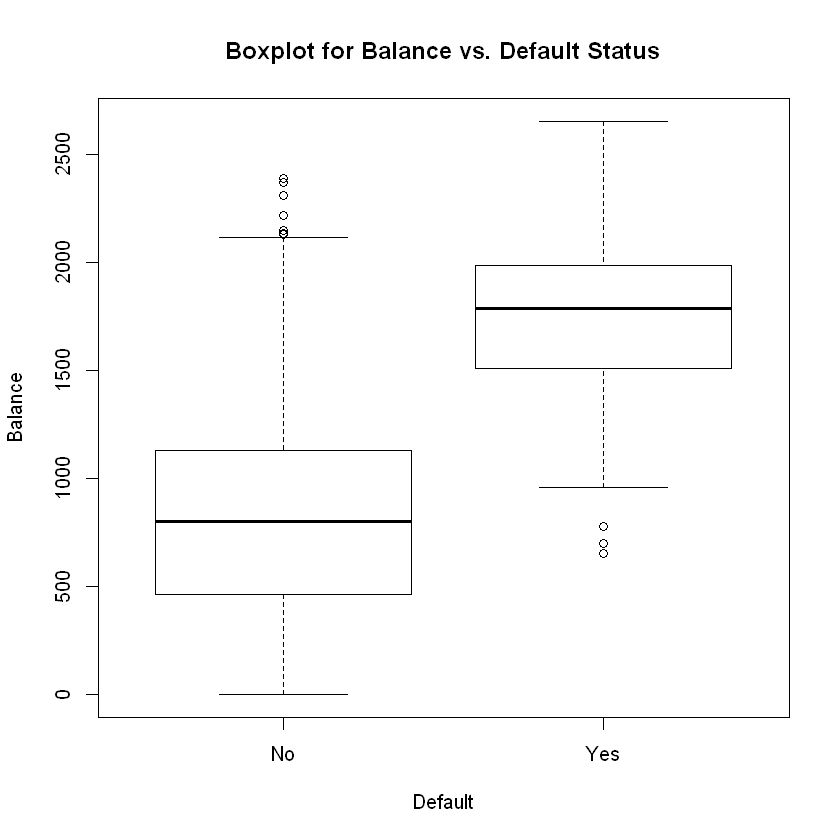

In [131]:
boxplot(balance~default,Default, names = c('No', 'Yes'), main='Boxplot for Balance vs. Default Status',ylab='Balance',xlab='Default')

Both plots seem to indicate that those who defaulted had higher account balances.

## Default Models

Let's build the following models:

1. No features $$logit(p) = b_{0}$$
2. One binary feature $$logit(p) = b_{0}+b_{1}stdt$$
3. One continuous feature $$logit(p) = b_{0}+b_{1}balance$$
4. All predictors $$logit(p) = b_{0}+b_{1}balance+b_{2}income+b_{3}stdt$$

Where $p = \frac{\text{Odds for}}{1 + \text{Odds for}}$, or the probability that default="Yes", and $logit(p)=log\left(\frac{p}{(1-p)}\right)$

### Model 1: No features

$logit(p) = b_{0}$

In [132]:
default_logistic_regression_a <- glm(dft~1,family=binomial(link='logit'),data=df)
summary(default_logistic_regression_a)


Call:
glm(formula = dft ~ 1, family = binomial(link = "logit"), data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.2603  -0.2603  -0.2603  -0.2603   2.6085  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.36833    0.05574  -60.43   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 2920.6  on 9999  degrees of freedom
AIC: 2922.6

Number of Fisher Scoring iterations: 6


Model 1 with no features represents the estimated log odds of being in default for the whole population. Let's transform the log odds back to regular odds using the equation

$$
log\left(\frac{p}{(1-p)}\right) = b_{0} = -3.36833
$$

Transforming the left side of the equation...

$$
\text{Odds for = }e^{log\left(\frac{p}{(1-p)}\right)} = e^{b_{0}} = e^{-3.36833}
$$

Yields...

$$
\text{Odds for = } e^{-3.36833} = 0.03447
$$

Now we can transform our *Odds for* calculation to get the global population probability of default:

$$
p = \frac{\text{Odds for}}{1 + \text{Odds for}} = \frac{0.03447}{1+0.03447} = 0.0333
$$

Thus the global population probability of default is ***0.0333***. If we run a count on the `default` column of our original dataframe, lo and behold!

In [133]:
table(Default$default)


  No  Yes 
9667  333 

Out of 10,000 records, 333 defaulted or $\frac{333}{10000} = 0.0333$ Thus our logistic regression model with no features accurately describes the population default rate.

### Model 2: One binary feature

$logit(p) = b_{0}+b_{1}stdt$

In [134]:
default_logistic_regression_b <- glm(dft~stdt,family=binomial(link='logit'),data=df)
summary(default_logistic_regression_b)


Call:
glm(formula = dft ~ stdt, family = binomial(link = "logit"), 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.2970  -0.2970  -0.2434  -0.2434   2.6585  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.50413    0.07071  -49.55  < 2e-16 ***
stdt         0.40489    0.11502    3.52 0.000431 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 2908.7  on 9998  degrees of freedom
AIC: 2912.7

Number of Fisher Scoring iterations: 6


#### Base case: non-students

Just like linear regression, the parameter estimate for the intercept $b_{0}$ is the Log Odds for non-students since that is the base case (stdt = 0) we defined up front. 

Converting to normal Odds...

$$
log\left(\frac{p}{(1-p)}\right) = b_{0} = -3.50413
$$

Transforming the left side of the equation...

$$
\text{Odds for = }e^{log\left(\frac{p}{(1-p)}\right)} = e^{b_{0}} = e^{-3.50413}
$$

Yields...

$$
\text{Odds for = } e^{-3.50413} = 0.03007
$$

Now we can transform our *Odds for* calculation to get the probability of default for non-students:

$$
p = \frac{\text{Odds for}}{1 + \text{Odds for}} = \frac{0.03007}{1+0.03007} = 0.02919
$$

Thus the probability of default for non-students is ***0.02919***.

#### `stdt=1` Probability of default for students

* Coefficient for student $(b_{1} = 0.40489)$ is the amount we must add to the intercept (or base case) to get the Log Odds for students:

$$
b_{0} + b_{1} = -3.50413 + 0.40489 = -3.09924
$$

Converting to normal Odds...

$$
log\left(\frac{p}{(1-p)}\right) = b_{0} = -3.09924
$$

Transforming the left side of the equation...

$$
\text{Odds for = }e^{log\left(\frac{p}{(1-p)}\right)} = e^{b_{0}+b_{1}} = e^{-3.09924}
$$

Yields...

$$
\text{Odds for = } e^{-3.09924} = 0.04508
$$

Now we can transform our *Odds for* calculation to get the probability of default for students:

$$
p = \frac{\text{Odds for}}{1 + \text{Odds for}} = \frac{0.04508}{1+0.04508} = 0.0431
$$

Thus the probability of default for students is ***0.0431***.

Students have higher default probability (0.0431) than non-students (0.02919)!

### Model 3: One continuous feature

$logit(p) = b_{0}+b_{1}balance$

In [135]:
default_logistic_regression_c <- glm(dft~balance,family=binomial(link='logit'),data=df)
summary(default_logistic_regression_c)


Call:
glm(formula = dft ~ balance, family = binomial(link = "logit"), 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2697  -0.1465  -0.0589  -0.0221   3.7589  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.065e+01  3.612e-01  -29.49   <2e-16 ***
balance      5.499e-03  2.204e-04   24.95   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1596.5  on 9998  degrees of freedom
AIC: 1600.5

Number of Fisher Scoring iterations: 8


#### Effect of `balance` on `default`

$b_{1}=0.0055$ so an increase in the balance is associated with increasing the log odds of default, hence the odds, hence the probability of default.
* Adding $1 to the default increases the log odds of default by 0.0055

### Making predictions $p(x) = \text{probability of default}$ using Model 3

$$
p(x) = \frac{e^{b_{0} + b_{1}x}}{1+e^{b_{0} + b_{1}x}}
$$

with $b_{0}=-10.65$ and $b_{1}=0.0055$

So if x=$1000, then 

$$
p(x) = \frac{e^{-10.65 + 0.0055*1000}}{1+e^{-10.65 + 0.0055*1000}} = 0.00576
$$

which is less than a 1% chance of default. Let's try a few more

If x=$1500, then 

$$
p(x) = \frac{e^{-10.65 + 0.0055*1500}}{1+e^{-10.65 + 0.0055*1500}} = 0.08317
$$

which is an 8.3% chance of default.

If x=$2000, then 

$$
p(x) = \frac{e^{-10.65 + 0.0055*2000}}{1+e^{-10.65 + 0.0055*2000}} = 0.5866
$$

which is a 58.7% chance of default. We can define a test data point and use the `predict` function just as we would with linear regression.

In [136]:
test <- data.frame(balance=2000)
test

balance
2000


In [137]:
predict(default_logistic_regression_c,test)

1 
0.3465032

***Note:***

By default `predict` spits out the logit probability. We still must transform it to arrive at the probability $p$:

$$
\text{Odds for = } e^{0.3465} = 1.414
$$

Now we can transform using our *Odds for* calculation to get the probability of default for students:

$$
p = \frac{\text{Odds for}}{1 + \text{Odds for}} = \frac{1.414}{1+1.414} = 0.5857
$$

Close enough. Either way we arrive at the same answer $p=58\%$ probability of default for a balance of $2000. Alternatively, we can just specify the `type='response'` parameter to get straight to the answer without all these intermediate math steps. See the help function for `predict` to see all parameter options.

In [138]:
predict(default_logistic_regression_c,test,type = 'response')

1 
0.5857694

### Model 4: All predictors 

$logit(p) = b_{0}+b_{1}balance+b_{2}income+b_{3}stdt$

In [139]:
default_logistic_regression_d <- glm(dft~balance+income+stdt,family=binomial(link='logit'),data=df)
summary(default_logistic_regression_d)


Call:
glm(formula = dft ~ balance + income + stdt, family = binomial(link = "logit"), 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4691  -0.1418  -0.0557  -0.0203   3.7383  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.087e+01  4.923e-01 -22.080  < 2e-16 ***
balance      5.737e-03  2.319e-04  24.738  < 2e-16 ***
income       3.033e-06  8.203e-06   0.370  0.71152    
stdt        -6.468e-01  2.363e-01  -2.738  0.00619 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1571.5  on 9996  degrees of freedom
AIC: 1579.5

Number of Fisher Scoring iterations: 8


* Note that $b_{0}=-10.87$,$b_{1}=0.0057$,$b_{2}=0.000003$,$b_{3}=-0.65$
* An increase in the balance is associated with increasing the log odds of default hence the odds, and hence the probability of default
* Adding $1 to the balance increases the log odds of default by 0.0057
* The coefficient of student =-0.65 implies that at a fixed value of balance and income, students are less likely to default than non-students. ***This contrasts our results from model 2***

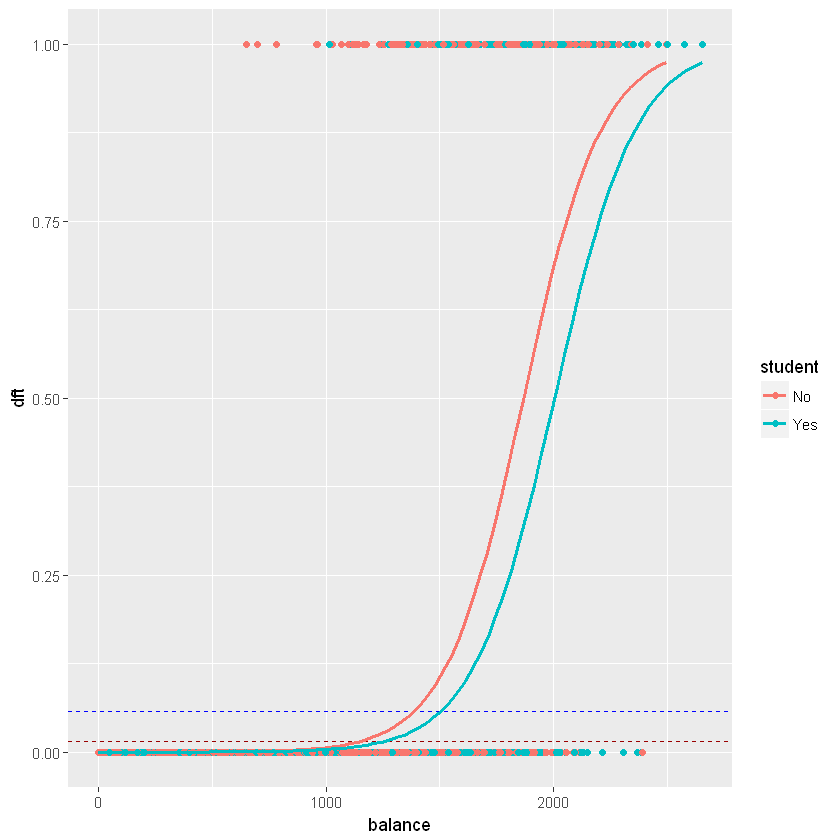

In [140]:
ggplot( df, aes(x=balance, y=dft,col=student)) +
  geom_point() +
  geom_hline(aes(yintercept=0.058), colour="blue", linetype="dashed")+
  geom_hline(aes(yintercept=0.015), colour="#990000", linetype="dashed") + 
  geom_smooth(method = "glm", 
    method.args = list(family = "binomial"), 
    se = FALSE) 

At the same credit card balance, an individual student will have a lower probability of default than a non-student, holding all other features constant.

However, students as a whole carry a higher balance on their credit cards, thus students (on average) default more on their credit cards, as evidenced by the dashed horizontal lines at the bottom of the plot. This phenomenon is called ***confounding***. For more info on [confounding](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/).

We have further evidence of the confounding effect when examining the difference in `balance` between students and non-students:

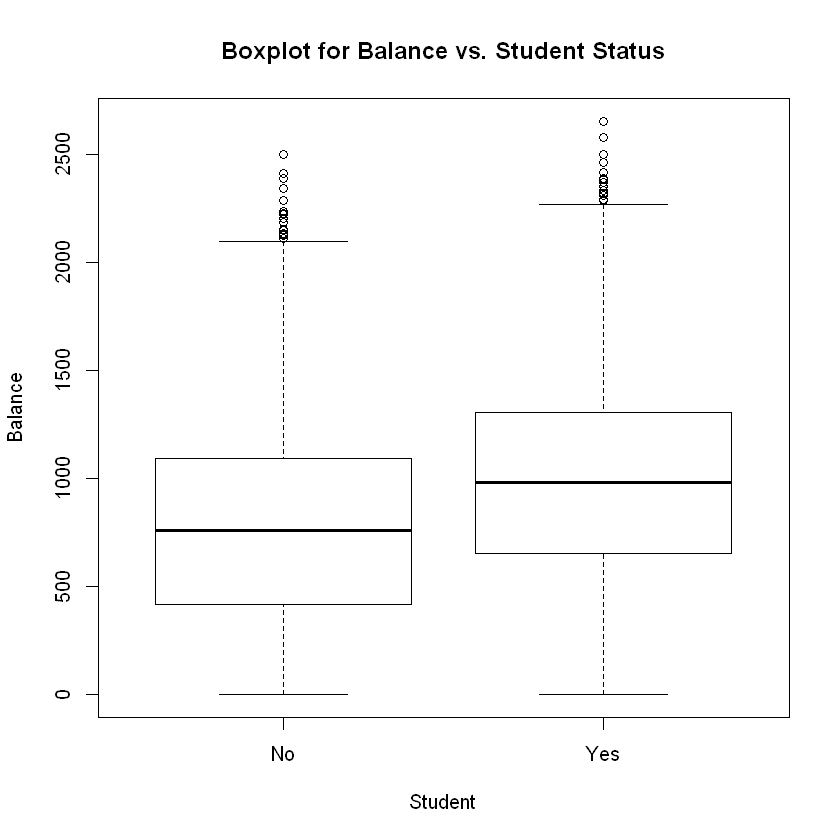

In [141]:
boxplot(balance~student,Default, main='Boxplot for Balance vs. Student Status',ylab='Balance',xlab='Student')

### Making predictions using fitted model

Following the same procedure as linear regression, we can specify a test data point and use the `predict` function with the `type = response` parameter to give us our probability for the given test data point. Armed with this probability, we can define our class seperation threshold and assign the test data point based on our threshold. 0.5 is a common starting value for the threshold.

In [142]:
test <- data.frame(balance=2000, income=40000, stdt=1)
test

balance,income,stdt
2000,40000,1


In [143]:
test_pred <- predict(default_logistic_regression_d, newdata = test, type = "response")
test_pred

1 
0.5196218

In [144]:
threshold <- 0.5
pred_outcome_model4 <- ifelse(test_pred >= threshold,1,0)
pred_outcome_model4

1 
1

There you have it! In three steps we can use the fitted logistic regression model to assign a test data point to a given class.

## True Negative and False Positive

Consider the case where $Y=0$ in reality.

We'll denote the predicted value $\hat{Y}$.

* If $\hat{Y} = Y = 0$ then we have a ***True Negative*** (Good)
* If $\hat{Y} = 1$ and $Y=0$ then we have a ***False Postivive*** (Bad)
* If we increase the threshold *p*, denoted by the red line below, we will see an increase in the True Negative rate and a decrease in the False Positive rate

In [145]:
x<-c(0,1,2,3,4,5)
f<-function(x){return(-1* (x-2)^2 + 3)}
y<-f(x)

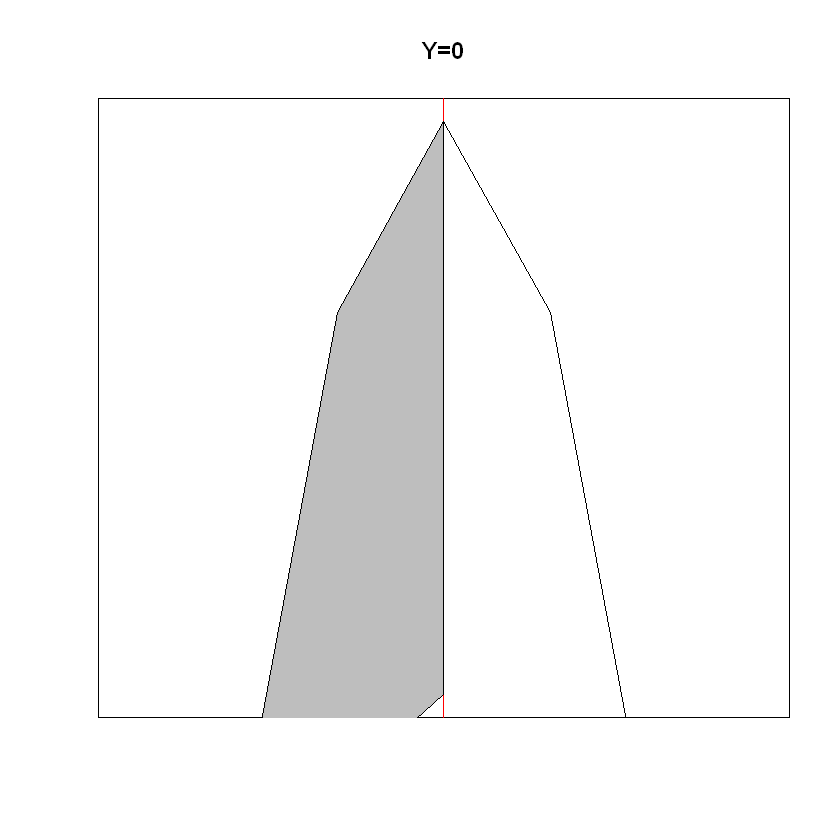

In [146]:
v<-2
plot(x,y,type='l',xlim = c(-1,5),ylim=c(0,3),main='Y=0',xaxt='n',yaxt='n',xlab='',ylab='')
par(mar=c(5,3,2,2)+0.1)
abline(v=v,col='red')
polygon(c( x[x<=v], v ),  c(y[x<=v],0 ), col="grey")

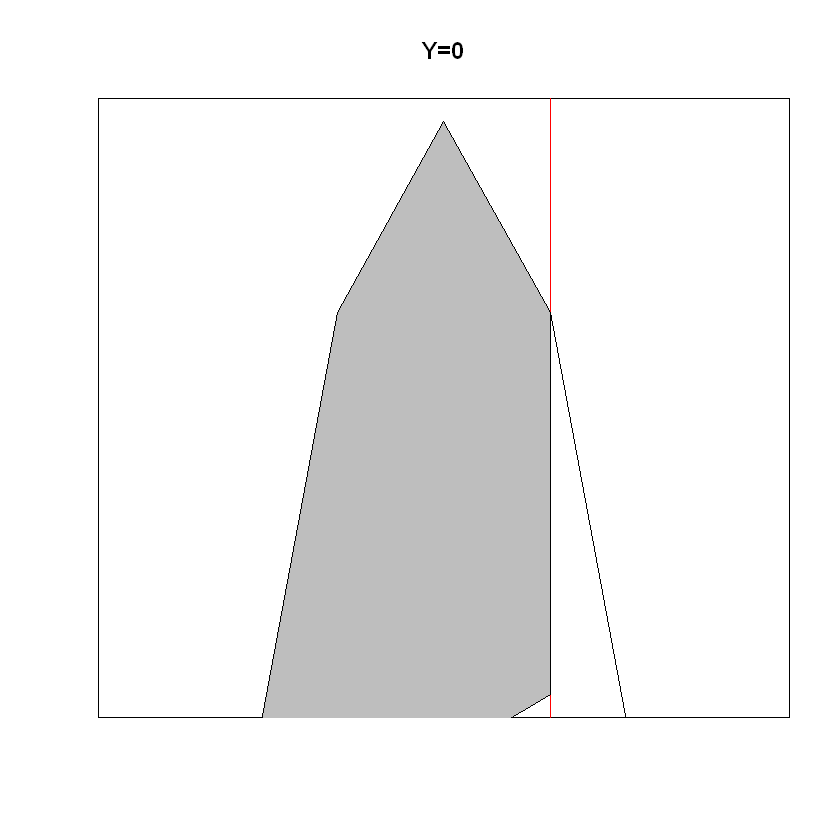

In [147]:
v<-3
plot(x,y,type='l',xlim = c(-1,5),ylim=c(0,3),main='Y=0',xaxt='n',yaxt='n',xlab='',ylab='')
par(mar=c(5,3,2,2)+0.1)
abline(v=v,col='red')
polygon(c( x[x<=v], v ),  c(y[x<=v],0 ), col="grey")

In the plots above the True Negative rate is shaded grey and the False Positive rate is shaded white. We can clearly see that increasing our threshold increases the True Negative rate and decreases the False Positive rate.

## True Positive and False Negative

Consider the case where $Y=1$ in reality.

We'll denote the predicted value $\hat{Y}$.

* If $\hat{Y} = Y = 1$ then we have a ***True Positive*** (Good)
* If $\hat{Y} = 0$ and $Y=1$ then we have a ***False Negative*** (Bad)
* If we increase the threshold *p*, denoted by the red line below, we will see an increase in the False Negative rate and a decrease in the True Positive rate

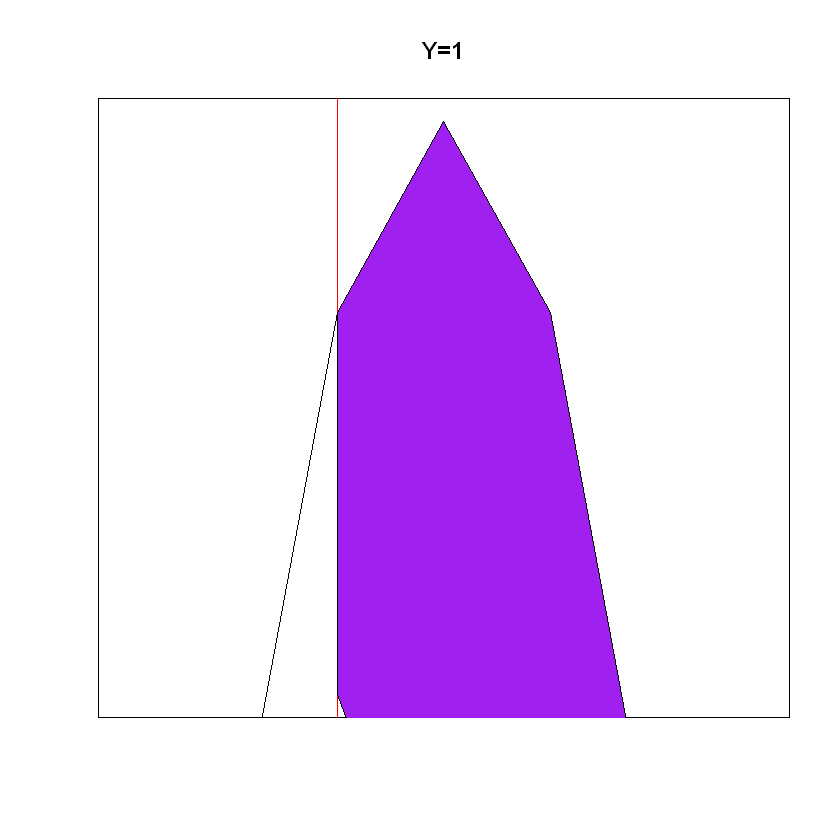

In [148]:
v<-1
plot(x,y,type='l',xlim = c(-1,5),ylim=c(0,3),main='Y=1',xaxt='n',yaxt='n',xlab='',ylab='')
par(mar=c(5,3,2,2)+0.1)
abline(v=v,col='red')
polygon(c( x[x>=v], v ),  c(y[x>=v],0 ), col="purple")

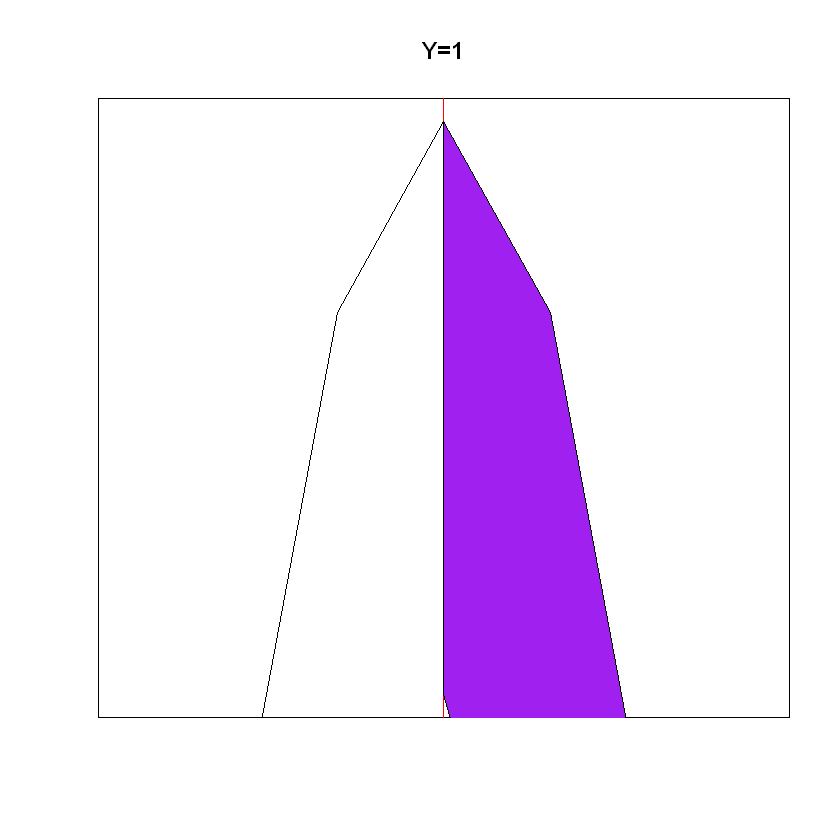

In [149]:
v<-2
plot(x,y,type='l',xlim = c(-1,5),ylim=c(0,3),main='Y=1',xaxt='n',yaxt='n',xlab='',ylab='')
par(mar=c(5,3,2,2)+0.1)
abline(v=v,col='red')
polygon(c( x[x>=v], v ),  c(y[x>=v],0 ), col="purple")

In the plots above the True Positive rate is shaded purple and the False Negative rate is shaded white. We can clearly see that increasing our threshold increases the False Negative rate and decreases the True Positive rate.

## Confusion Matrix

Used to record performance of a classification algorithm. We can use the R function `xtabs` to make the confusion matrix. But first let's split data into training and test sets so our confusion matrix is closer to reality.

### Split dataset into Training and Test sets

Let's formally split the dataset into training and test sets to demonstrate the confusion matrix.

In [150]:
spec = c(train = .8, test = .2)

g = sample(cut(
  seq(nrow(df)), 
  nrow(df)*cumsum(c(0,spec)),
  labels = names(spec)
))

split_data_set = split(df, g)
attributes(split_data_set)

$names
[1] "train" "test"

In [151]:
sapply(split_data_set, nrow)/nrow(df)

train  test 
  0.8   0.2

We have an 80% training set and a 20% test set to train and make predictions on. Let's do this!

In [152]:
default_logistic_regression_e <- glm( dft~balance+income+stdt, data = split_data_set$train, family = binomial(logit))

In [153]:
split_data_set$test$predictions  <- predict(default_logistic_regression_e, newdata = split_data_set$test, type = "response")

In [154]:
head(split_data_set$test)

,default,student,balance,income,dft,stdt,predictions
6,No,Yes,919.5885,7491.559,0,1,2.018863e-03
15,No,No,1112.9684,23810.174,0,0,1.146993e-02
17,No,No,0.0000,50265.312,0,0,1.785216e-05
20,No,No,1095.0727,26464.631,0,0,1.038056e-02
22,No,No,954.2618,32457.509,0,0,4.618877e-03
24,No,No,641.9844,30466.103,0,0,7.430692e-04


Let's use a threshold of 0.5 to classify our points.

In [155]:
split_data_set$test$pred_class0.5 <- ifelse(split_data_set$test$predictions>=0.5, 1, 0)

In [156]:
head(split_data_set$test)

,default,student,balance,income,dft,stdt,predictions,pred_class0.5
6,No,Yes,919.5885,7491.559,0,1,2.018863e-03,0
15,No,No,1112.9684,23810.174,0,0,1.146993e-02,0
17,No,No,0.0000,50265.312,0,0,1.785216e-05,0
20,No,No,1095.0727,26464.631,0,0,1.038056e-02,0
22,No,No,954.2618,32457.509,0,0,4.618877e-03,0
24,No,No,641.9844,30466.103,0,0,7.430692e-04,0


Now that we have the predicted classes $\hat{y}$ `pred_class` and the real classes $y$ `dft` side-by-side in our dataframe, we can call `xtabs` to generate the confusion matrix.

In [157]:
xtabs(~dft + pred_class0.5, data=split_data_set$test)

   pred_class0.5
dft    0    1
  0 1921   13
  1   46   20

The ***true values are always rows of confusion matrix*** while our ***predicted values are always columns in confusion matrix***.
* True Negative (TN) values $\hat{y} = y = 0$
    * 1921 in this example
* True Positive (TP) values $\hat{y} = y = 1$
    * 20 in this example
* False Positive (FP) values $\hat{y} = 1$ and $y=0$
    * 13 in this example
* False Negative (FN) values $\hat{y} = 0$ and $y=1$
    * 46 in this example

More broadly speaking,

False Positives are refered to as ***Type I*** errors
* Increasing the threshold value decreases Type I error

False negatives are referred to as ***Type II*** errors
* Increasing the threshold increases Type II error

Typically there is a cost associated with Type I and Type II errors - domain knowledge is needed to determine this cost and usually the cost is specific to the given context of the business problem.

For example, imagine you are testing a patient for HIV - the cost of a false positive in this context is extremely high because you just misdiagnosed a healthy person as being HIV positive!! Doctors lose license to practice over misdiagnoses like this.

On the flip side, if you are a bank predicting loan default - chances are the cost of a Type II error or the cost of predicting a person who is going to default on their loan as a non-defaulter far outweighs the cost of a Type I error.

Using the confusion matrix we can define a bunch of metrics for how well our algorithm performs on the test set. These are defined below:

## Sensitivity

Sensitivity is also known as the ***True Positive Rate*** and is defined as follows:

$$
Sensitivity = \frac{\text{true positive}}{\text{true positive + false negative}}
$$

Using our example above, we find the sensitivity to be

$$
Sensitivity = \frac{20}{20+46} = 0.303
$$

## Specificity

Specificity is also known as the ***True Negative Rate*** and is defined as follows:

$$
Specificity = \frac{\text{true negative}}{\text{true negative + false positive}}
$$

Using our example above, we find the specificity to be

$$
Specificity =  \frac{1921}{1921+13} = 0.993
$$

## False Positive Rate

The false positive rate is equal to

$$
False \: Positive \: Rate = 1 - Specificity
$$

Using our example above, we find the false positive rate to be

$$
False \: Positive \: Rate =  1 - 0.993 = 0.007
$$

## Precision

Precision is the probability that the real value is a certain class given the fact that we predicted that class or more formally

$$
P(Y=1\:|\:\hat{Y}=1) = \frac{\text{true positive}}{\text{true positive + false positive}}
$$

Using our example above, our precision is

$$
P(Y=1\:|\:\hat{Y}=1) = \frac{20}{20+13} = 0.606
$$

## Accuracy

Accuracy is defined by the following formula:

$$
Accuracy = \frac{\text{true positive + true negative}}{\text{true positive + false positive + true negative + false negative}}
$$

Using our example above, our accuracy is:

$$
Accuracy = \frac{1921+20}{20+13+1921+46} = 0.971
$$

## Effects of increasing threshold $p$

Let's use the same example above, but increase the threshold of 0.5 to 0.9 to classify our points. We will see that ***increasing the threshold $p$*** will 
* increase true negatives and decrease false positives
* increase false negatives and decrease true positives

In [158]:
split_data_set$test$pred_class0.9 <- ifelse(split_data_set$test$predictions>=0.9, 1, 0)

In [159]:
head(split_data_set$test)

,default,student,balance,income,dft,stdt,predictions,pred_class0.5,pred_class0.9
6,No,Yes,919.5885,7491.559,0,1,2.018863e-03,0,0
15,No,No,1112.9684,23810.174,0,0,1.146993e-02,0,0
17,No,No,0.0000,50265.312,0,0,1.785216e-05,0,0
20,No,No,1095.0727,26464.631,0,0,1.038056e-02,0,0
22,No,No,954.2618,32457.509,0,0,4.618877e-03,0,0
24,No,No,641.9844,30466.103,0,0,7.430692e-04,0,0


Now that we have the predicted classes $\hat{y}$ `pred_class` and the real classes $y$ `dft` side-by-side in our dataframe, we can call `xtabs` to generate the confusion matrix.

In [160]:
xtabs(~dft + pred_class0.9, data=split_data_set$test)

   pred_class0.9
dft    0    1
  0 1934    0
  1   61    5

## Sensitivity increased $p$

Using our example above, with a threshold $p=0.9$ we find the sensitivity to be

$$
Sensitivity = \frac{\text{true positive}}{\text{true positive + false negative}} = \frac{5}{5+61} = 0.077
$$

## Specificity increased $p$

Using our example above, with a threshold $p=0.9$ we find the specificity to be

$$
Specificity = \frac{\text{true negative}}{\text{true negative + false positive}} = \frac{1934}{1934+0} = 1.0
$$

## ROC Curve

Receiver Operating Characteristic (ROC) curve is used to show the diagnostic ability of a binary classifier as the threshold value $p$ is varied.

In [161]:
if (!require(ggExtra)) install.packages("ggExtra")
library(ggExtra)
if (!require(ROCR)) install.packages("ROCR")
library(ROCR)

First we must create a `prediction` object using the class probabilities from our logistic regression model

In [162]:
pred <- prediction(split_data_set$test$predictions, split_data_set$test$dft)
class(pred)

[1] "prediction"
attr(,"package")
[1] "ROCR"

Second we create a `performance` object passing the `prediction` object as the first parameter and `tpr` and `fpr` as the second and third arguments respectfully. "tpr" is True Positive Rate and "fpr" is the False Positive Rate.

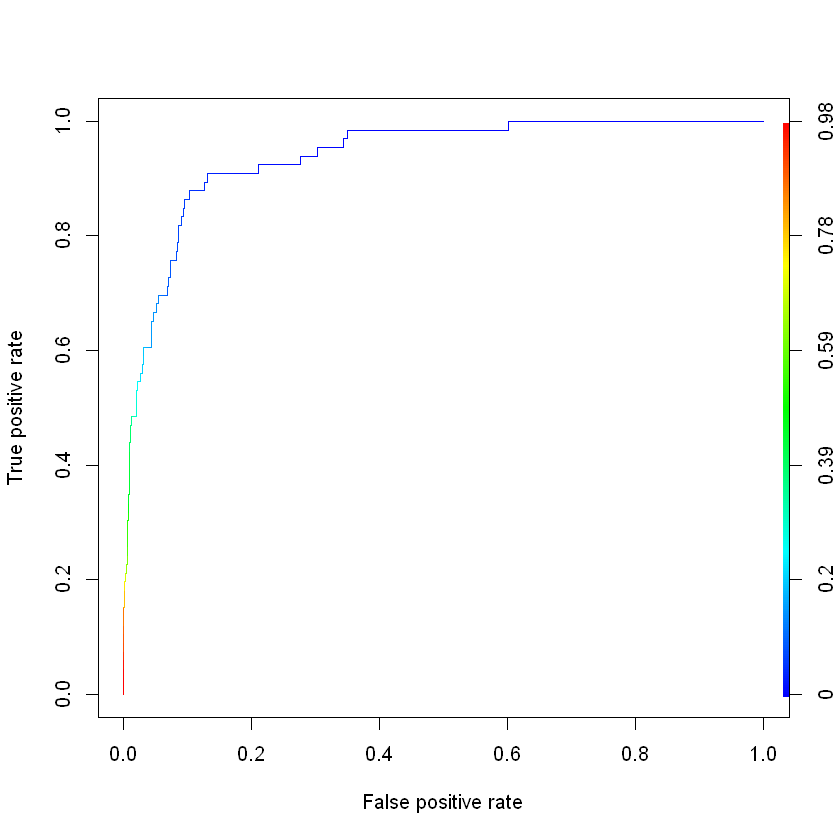

In [163]:
perf <- performance(pred, "tpr", "fpr")
plot(perf, colorize=T)

In [164]:
auc <- performance(pred, measure="auc")
auc@y.values

[[1]]
[1] 0.9400677

Our AUC in this case is 0.94. This is great! Typically we want an AUC value greater than 0.5.